# Bayesian Causal Inference
in a bivariate scenario we want to decide wether $X\rightarrow Y$ or $Y\rightarrow X$ holds

In [13]:
from importlib import reload
import sys
sys.path.append('..')

import nifty5 as nifty
import numpy as np
import scipy.linalg
from sklearn.preprocessing import MinMaxScaler, StandardScaler
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

import bayesian_causal_model.cause_model_shallow
import bayesian_causal_model.bayesian_causal_sampling
import bayesian_causal_model.cause_model_deep
reload(bayesian_causal_model.cause_model_shallow)
import logging
logging.basicConfig(filename='example.log', level=logging.DEBUG)

### Sampling
sample $\beta$ and $f$ with 
$p(x) = e^{\beta (x)},   
\beta \hookleftarrow \mathcal{G}(\beta, B),   
f \hookleftarrow \mathcal{G}(f, F)$

$F, B$ are diagonal in Fourier Space, that is

$\mathcal{F}[F](k, q) = 2\pi \delta (k-q)P_f(k)$

$\mathcal{F}[B](k, q) = 2\pi \delta (k-q)P_\beta(k)$

For the power spectra we choose


$P_f(q) = P_\beta(q) = \frac{a}{((\frac{q}{q_0})^4 + 1}$
where we set $a=2$, $q_0=1$

#### sample (and plot) the functions $\beta$ and $f$:

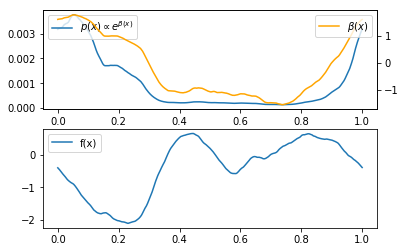

In [2]:
a = 1e6
q_0 = 1
p_spec = lambda q: a/((q/q_0)**4 + 1)

bcs = bayesian_causal_model.bayesian_causal_sampling.BayesianCausalSampler(
    power_spectrum_beta=p_spec,
    power_spectrum_f=p_spec,
    noise_var=0.1)

x = np.linspace(0, 1, bcs.N_bins)
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(x, bcs.p_x_val, label=r'$p(x) \propto e^{\beta(x)}$')
ax1.legend(loc=2)
ax1_2 = ax1.twinx()
ax1_2.plot(x, np.array(bcs.beta.val), c='orange', label=r'$\beta(x)$')
ax1_2.legend(loc=1)
ax2.plot(x, bcs.f_val, label='f(x)')
ax2.legend()


#### sample and plot $x$ and $y$
we draw the $x$ samples from $p(x) = e^{\beta(x)}$ and the $y$ samples according to

$y = f(x) + n$

where we sample each $n$:

$n\hookleftarrow \mathcal{G}(n, \sigma_n)$

and we choose:

$\sigma_n = 0.1$

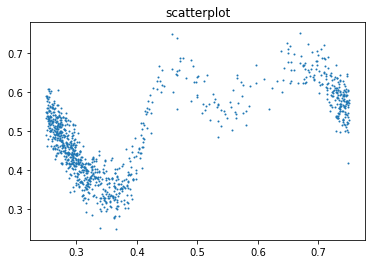

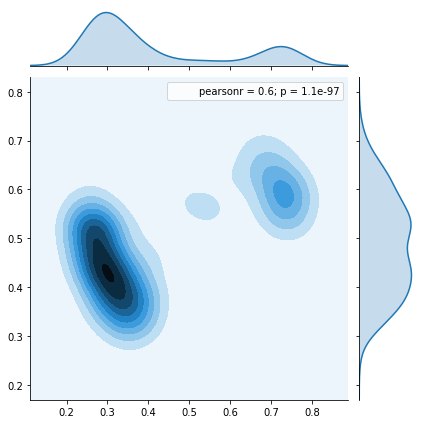

In [3]:
# take 1000 samples
x, y = bcs.get_samples(1000)
# scale both data samples to [0, 1] range
scaler = MinMaxScaler(feature_range=(0.25, 0.75))
#scaler = StandardScaler()
x, y = scaler.fit_transform(np.array((x, y)).T).T
fig, ax= plt.subplots(1)
ax.scatter(x, y, s=1)
ax.set_title('scatterplot')
plot = sns.jointplot(x, y, kind="kde")


## Inference
Now we want to test our inference model. The desired result is of course $X\rightarrow Y$

In [9]:
reload(bayesian_causal_model.bayesian_causal_model)
reload(bayesian_causal_model.cause_model_shallow)

%pdb 0
bcm = bayesian_causal_model.cause_model_shallow.BayesianCausalModelShallow(
    noise_var=0.1,
    N_pix=256,
    rho=1,
    power_spectrum_beta=lambda q:2/((q/q_0)**4 + 1),
    power_spectrum_f=lambda q:2/((q/q_0)**4 + 1),
    minimization='nifty_vl_bfgs',
    controller=nifty.GradientNormController(tol_rel_gradnorm=1e-3, convergence_level=8, name='minimization')
    )

bcm.set_data(x,y)
reload(logging)
logging.basicConfig(filename='example.log', level=logging.DEBUG)
bcm.get_evidence()



minimization: Iteration #0 energy=2.359438E+04 gradnorm=1.04E+05 clvl=0
minimization: Iteration #1 energy=7.042072E+03 gradnorm=4.07E+04 clvl=0
minimization: Iteration #2 energy=3.963065E+03 gradnorm=2.19E+04 clvl=0
minimization: Iteration #3 energy=2.053222E+03 gradnorm=1.38E+04 clvl=0
minimization: Iteration #4 energy=1.207992E+03 gradnorm=1.42E+04 clvl=0
minimization: Iteration #5 energy=7.139602E+02 gradnorm=9.29E+03 clvl=0
minimization: Iteration #6 energy=4.954227E+02 gradnorm=5.91E+03 clvl=0
minimization: Iteration #7 energy=3.142460E+02 gradnorm=4.52E+03 clvl=0
minimization: Iteration #8 energy=2.230347E+02 gradnorm=5.51E+03 clvl=0
minimization: Iteration #9 energy=1.515908E+02 gradnorm=3.14E+03 clvl=0
minimization: Iteration #10 energy=1.064828E+02 gradnorm=2.66E+03 clvl=0
minimization: Iteration #11 energy=6.532165E+01 gradnorm=2.88E+03 clvl=0
minimization: Iteration #12 energy=3.457986E+01 gradnorm=3.50E+03 clvl=0
minimization: Iteration #13 energy=7.790496E+00 gradnorm=1.87

Automatic pdb calling has been turned OFF


minimization: Iteration #22 energy=-8.741630E+01 gradnorm=9.51E+02 clvl=0
minimization: Iteration #23 energy=-9.271103E+01 gradnorm=1.03E+03 clvl=0
minimization: Iteration #24 energy=-9.837077E+01 gradnorm=1.22E+03 clvl=0
minimization: Iteration #25 energy=-1.048176E+02 gradnorm=1.56E+03 clvl=0
minimization: Iteration #26 energy=-1.117061E+02 gradnorm=1.03E+03 clvl=0
minimization: Iteration #27 energy=-1.200121E+02 gradnorm=9.75E+02 clvl=0
minimization: Iteration #28 energy=-1.249341E+02 gradnorm=1.49E+03 clvl=0
minimization: Iteration #29 energy=-1.304536E+02 gradnorm=9.64E+02 clvl=0
minimization: Iteration #30 energy=-1.365533E+02 gradnorm=7.88E+02 clvl=0
minimization: Iteration #31 energy=-1.399856E+02 gradnorm=1.21E+03 clvl=0
minimization: Iteration #32 energy=-1.433346E+02 gradnorm=6.99E+02 clvl=0
minimization: Iteration #33 energy=-1.461484E+02 gradnorm=5.84E+02 clvl=0
minimization: Iteration #34 energy=-1.482051E+02 gradnorm=7.48E+02 clvl=0
minimization: Iteration #35 energy=-1.

minimization: Iteration #133 energy=-8.218390E+02 gradnorm=1.40E+03 clvl=0
minimization: Iteration #134 energy=-8.362797E+02 gradnorm=1.05E+03 clvl=0
minimization: Iteration #135 energy=-8.482795E+02 gradnorm=1.78E+03 clvl=0
minimization: Iteration #136 energy=-8.602159E+02 gradnorm=1.56E+03 clvl=0
minimization: Iteration #137 energy=-8.697236E+02 gradnorm=1.01E+03 clvl=0
minimization: Iteration #138 energy=-8.808730E+02 gradnorm=1.24E+03 clvl=0
minimization: Iteration #139 energy=-8.861483E+02 gradnorm=1.94E+03 clvl=0
minimization: Iteration #140 energy=-8.935367E+02 gradnorm=1.20E+03 clvl=0
minimization: Iteration #141 energy=-9.056207E+02 gradnorm=8.99E+02 clvl=0
minimization: Iteration #142 energy=-9.205369E+02 gradnorm=1.42E+03 clvl=0
minimization: Iteration #143 energy=-9.235893E+02 gradnorm=3.35E+03 clvl=0
minimization: Iteration #144 energy=-9.290974E+02 gradnorm=2.62E+03 clvl=0
minimization: Iteration #145 energy=-9.383556E+02 gradnorm=1.50E+03 clvl=0
minimization: Iteration #

minimization: Iteration #243 energy=-1.185947E+03 gradnorm=4.98E+02 clvl=0
minimization: Iteration #244 energy=-1.187173E+03 gradnorm=3.77E+02 clvl=0
minimization: Iteration #245 energy=-1.188433E+03 gradnorm=6.78E+02 clvl=0
minimization: Iteration #246 energy=-1.189349E+03 gradnorm=4.99E+02 clvl=0
minimization: Iteration #247 energy=-1.190012E+03 gradnorm=2.77E+02 clvl=0
minimization: Iteration #248 energy=-1.190663E+03 gradnorm=2.72E+02 clvl=0
minimization: Iteration #249 energy=-1.191527E+03 gradnorm=4.33E+02 clvl=0
minimization: Iteration #250 energy=-1.192710E+03 gradnorm=4.12E+02 clvl=0
minimization: Iteration #251 energy=-1.193727E+03 gradnorm=6.17E+02 clvl=0
minimization: Iteration #252 energy=-1.194633E+03 gradnorm=3.58E+02 clvl=0
minimization: Iteration #253 energy=-1.195387E+03 gradnorm=3.20E+02 clvl=0
minimization: Iteration #254 energy=-1.196270E+03 gradnorm=4.06E+02 clvl=0
minimization: Iteration #255 energy=-1.196598E+03 gradnorm=7.78E+02 clvl=0
minimization: Iteration #

minimization: Iteration #353 energy=-1.276838E+03 gradnorm=2.59E+02 clvl=0
minimization: Iteration #354 energy=-1.277445E+03 gradnorm=2.66E+02 clvl=0
minimization: Iteration #355 energy=-1.278151E+03 gradnorm=4.51E+02 clvl=0
minimization: Iteration #356 energy=-1.278767E+03 gradnorm=4.88E+02 clvl=0
minimization: Iteration #357 energy=-1.279391E+03 gradnorm=3.12E+02 clvl=0
minimization: Iteration #358 energy=-1.280262E+03 gradnorm=3.03E+02 clvl=0
minimization: Iteration #359 energy=-1.280984E+03 gradnorm=4.28E+02 clvl=0
minimization: Iteration #360 energy=-1.281836E+03 gradnorm=4.03E+02 clvl=0
minimization: Iteration #361 energy=-1.282750E+03 gradnorm=3.02E+02 clvl=0
minimization: Iteration #362 energy=-1.283274E+03 gradnorm=7.64E+02 clvl=0
minimization: Iteration #363 energy=-1.283977E+03 gradnorm=3.05E+02 clvl=0
minimization: Iteration #364 energy=-1.284312E+03 gradnorm=2.73E+02 clvl=0
minimization: Iteration #365 energy=-1.284819E+03 gradnorm=4.12E+02 clvl=0
minimization: Iteration #

minimization: Iteration #463 energy=-1.319274E+03 gradnorm=2.52E+02 clvl=0
minimization: Iteration #464 energy=-1.319475E+03 gradnorm=1.42E+02 clvl=0
minimization: Iteration #465 energy=-1.319676E+03 gradnorm=1.57E+02 clvl=0
minimization: Iteration #466 energy=-1.319837E+03 gradnorm=2.53E+02 clvl=0
minimization: Iteration #467 energy=-1.320081E+03 gradnorm=1.76E+02 clvl=0
minimization: Iteration #468 energy=-1.320376E+03 gradnorm=2.28E+02 clvl=0
minimization: Iteration #469 energy=-1.320596E+03 gradnorm=2.88E+02 clvl=0
minimization: Iteration #470 energy=-1.320803E+03 gradnorm=2.00E+02 clvl=0
minimization: Iteration #471 energy=-1.321110E+03 gradnorm=1.90E+02 clvl=0
minimization: Iteration #472 energy=-1.321451E+03 gradnorm=2.47E+02 clvl=0
minimization: Iteration #473 energy=-1.321634E+03 gradnorm=5.21E+02 clvl=0
minimization: Iteration #474 energy=-1.321926E+03 gradnorm=3.03E+02 clvl=0
minimization: Iteration #475 energy=-1.322239E+03 gradnorm=1.57E+02 clvl=0
minimization: Iteration #

minimization: Iteration #573 energy=-1.338880E+03 gradnorm=2.11E+02 clvl=0
minimization: Iteration #574 energy=-1.339160E+03 gradnorm=2.23E+02 clvl=0
minimization: Iteration #575 energy=-1.339210E+03 gradnorm=5.74E+02 clvl=0
minimization: Iteration #576 energy=-1.339304E+03 gradnorm=5.08E+02 clvl=0
minimization: Iteration #577 energy=-1.339474E+03 gradnorm=3.91E+02 clvl=0
minimization: Iteration #578 energy=-1.339737E+03 gradnorm=1.90E+02 clvl=0
minimization: Iteration #579 energy=-1.339926E+03 gradnorm=1.66E+02 clvl=0
minimization: Iteration #580 energy=-1.340041E+03 gradnorm=2.11E+02 clvl=0
minimization: Iteration #581 energy=-1.340247E+03 gradnorm=2.45E+02 clvl=0
minimization: Iteration #582 energy=-1.340521E+03 gradnorm=3.42E+02 clvl=0
minimization: Iteration #583 energy=-1.340894E+03 gradnorm=2.24E+02 clvl=0
minimization: Iteration #584 energy=-1.341123E+03 gradnorm=1.55E+02 clvl=0
minimization: Iteration #585 energy=-1.341349E+03 gradnorm=2.45E+02 clvl=0
minimization: Iteration #

minimization: Iteration #683 energy=-1.352801E+03 gradnorm=1.32E+02 clvl=2
minimization: Iteration #684 energy=-1.352882E+03 gradnorm=1.25E+02 clvl=1
minimization: Iteration #685 energy=-1.352969E+03 gradnorm=9.27E+01 clvl=2
minimization: Iteration #686 energy=-1.353071E+03 gradnorm=1.52E+02 clvl=1
minimization: Iteration #687 energy=-1.353148E+03 gradnorm=1.45E+02 clvl=0
minimization: Iteration #688 energy=-1.353201E+03 gradnorm=1.06E+02 clvl=0
minimization: Iteration #689 energy=-1.353289E+03 gradnorm=8.43E+01 clvl=1
minimization: Iteration #690 energy=-1.353414E+03 gradnorm=1.30E+02 clvl=0
minimization: Iteration #691 energy=-1.353440E+03 gradnorm=3.62E+02 clvl=0
minimization: Iteration #692 energy=-1.353487E+03 gradnorm=2.99E+02 clvl=0
minimization: Iteration #693 energy=-1.353569E+03 gradnorm=1.99E+02 clvl=0
minimization: Iteration #694 energy=-1.353687E+03 gradnorm=8.16E+01 clvl=1
minimization: Iteration #695 energy=-1.353751E+03 gradnorm=1.25E+02 clvl=0
minimization: Iteration #

NameError: name 'probe_operator' is not defined

### investigate the inference process
We want to see the result of the minimization process for $\gamma[\beta]$, that is $\beta_0$

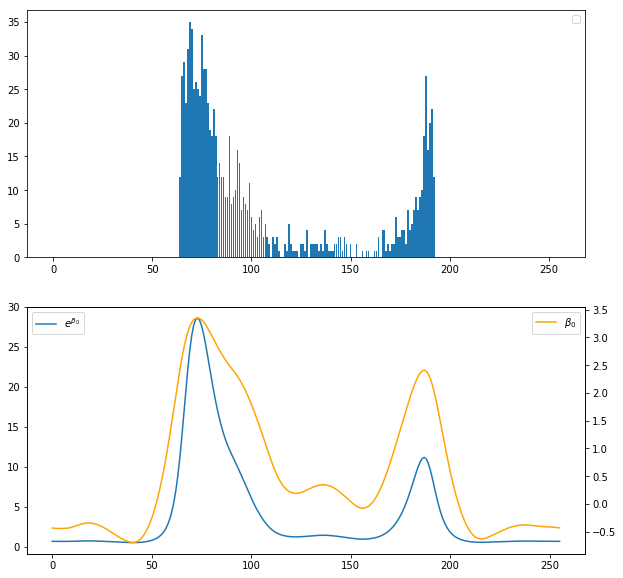

In [10]:
#bcm.get_evidence(x, y, verbosity=1)
fig = plt.figure(figsize=(10, 10))
ax1, ax2 = fig.subplots(2, 1)
ax1.bar(range(len(bcm.k_x)), bcm.k_x.tolist())# + np.zeros(128).tolist(), label=r'$k$')
ax1.legend()
ax2.plot(np.exp(bcm.beta_0.val), label=r'$e^{\beta_0}$')
ax2_1 = ax2.twinx()
ax2.legend(loc=2)
ax2_1.plot(np.array(bcm.beta_0.val), c='orange', label=r'$\beta_0$')
ax2_1.legend(loc=1)

In [19]:
bcm.get_evidence(infer_noise=0, infer_power_spectrum_beta=1, infer_power_spectrum_f=0)


TypeError: get_evidence() got an unexpected keyword argument 'infer_power_spectrum_beta'

#### plot the curvature matrix $D$

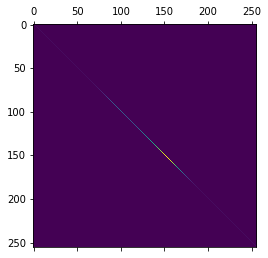

In [44]:
D = bayesian_causal_model.bayesian_causal_model.DBOperator(
    domain=bcm.s_space, beta=bcm.beta_0, k=bcm.k_x, grid=bcm.grid, rho=1e4, power_spectrum=bcm.power_spectrum_beta)
d1= bayesian_causal_model.bayesian_causal_model.probe_operator()
d2 = bayesian_causal_model.bayesian_causal_model.probe_operator(DB.rho_e_beta_diag)
plt.matshow(d2)

 ### do a deeper inference, including power spectra

Automatic pdb calling has been turned OFF


TypeError: __init__() missing 2 required positional arguments: 'x' and 'y'